In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
# Dataset link : 'https://www.kaggle.com/datasets/uciml/iris' -- Iris dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [79]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [80]:
df.drop(['Id'],axis=1,inplace=True)

In [81]:
print(df['Species'].nunique(),"are the total number of categories in the target variable")
#This is a multi-class classification problem

3 are the total number of categories in the target variable


In [82]:
cont_features = df.select_dtypes(include=np.number)
stats = cont_features.describe().T
stats['Skewness'] = cont_features.skew()
stats

,count,mean,std,min,25%,50%,75%,max,Skewness
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9,0.314911
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4,0.334053
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9,-0.274464
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5,-0.104997


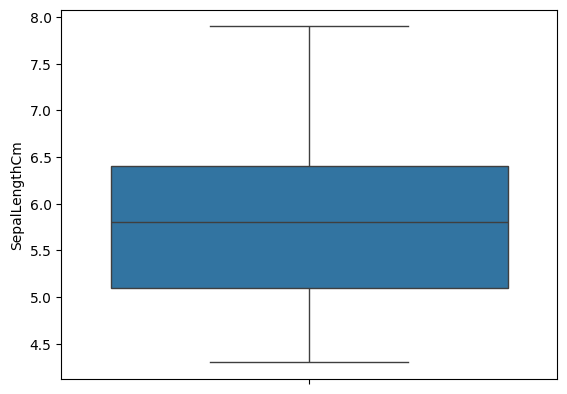

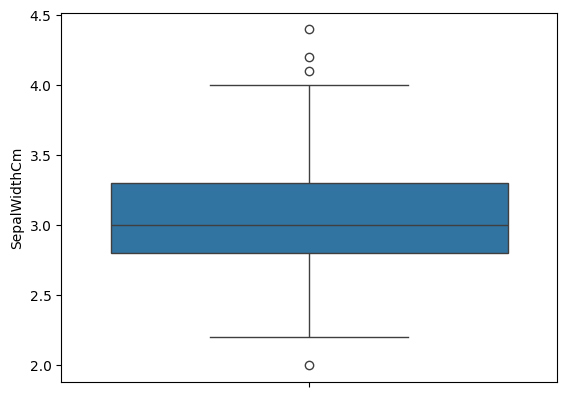

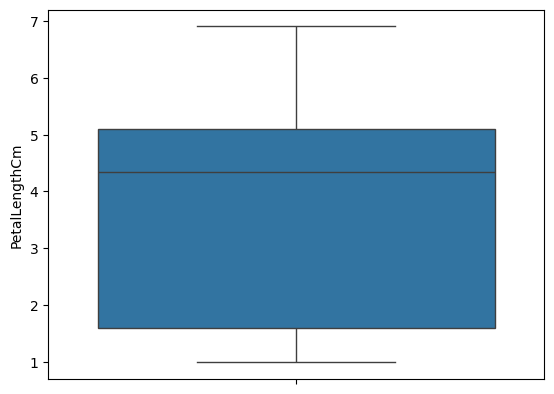

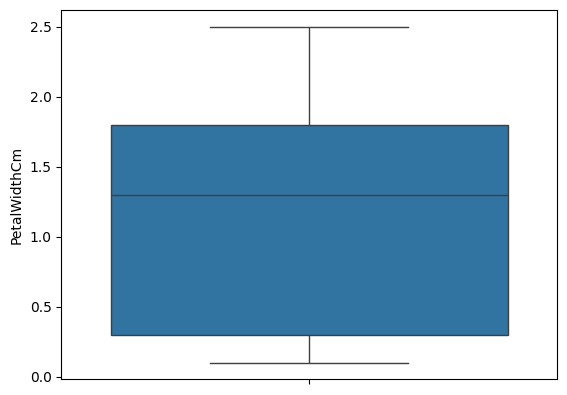

In [83]:
#Checking for outliers
for col in cont_features.columns:
  sns.boxplot(df[col])
  plt.show()

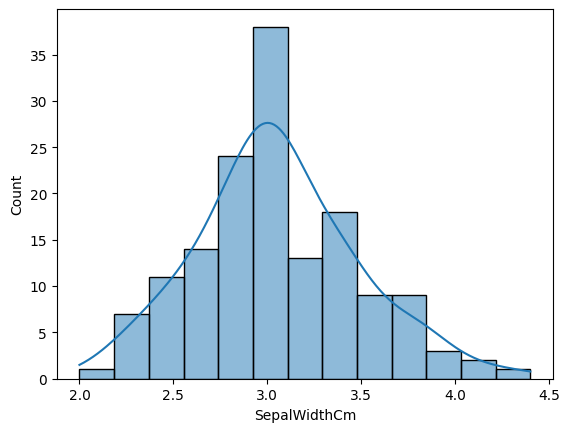

In [84]:
sns.histplot(df['SepalWidthCm'],kde=True)
plt.show()

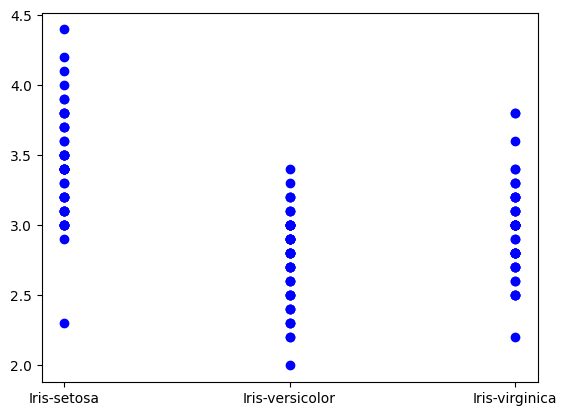

In [85]:
plt.plot(df['Species'],df['SepalWidthCm'],'bo')
plt.show()

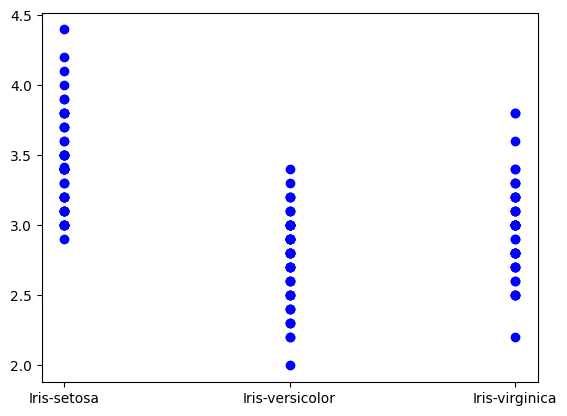

In [86]:
#Removing some extreme outliers
df.loc[(df['Species'] == 'Iris-setosa') & (df['SepalWidthCm'] < 2.5), 'SepalWidthCm'] = mean['Iris-setosa']
plt.plot(df['Species'],df['SepalWidthCm'],'bo')
plt.show()

Skewness of SepalLengthCm is 0.3149109566369728


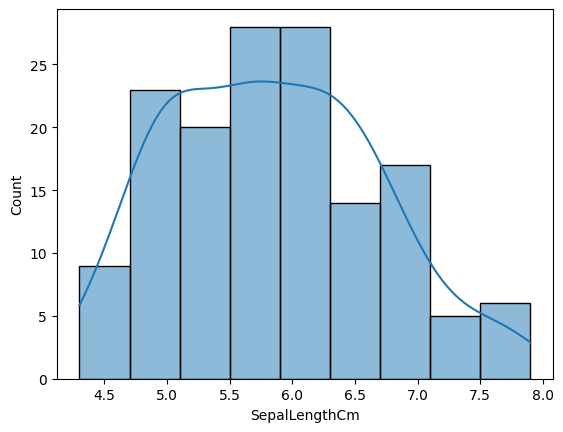

Skewness of SepalWidthCm is 0.330230299928994


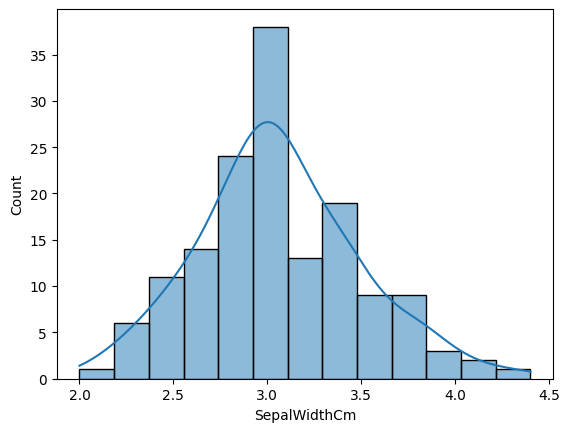

Skewness of PetalLengthCm is -0.27446425247378287


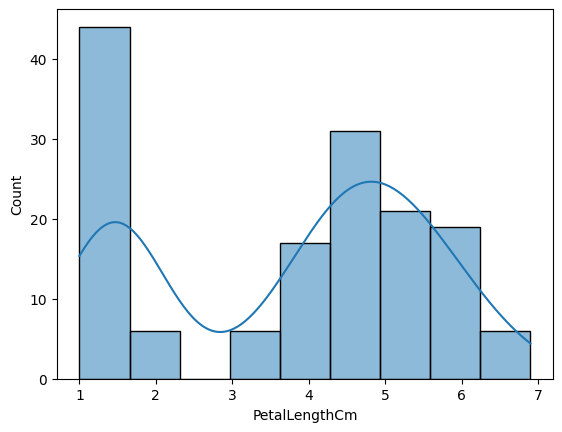

Skewness of PetalWidthCm is -0.10499656214412734


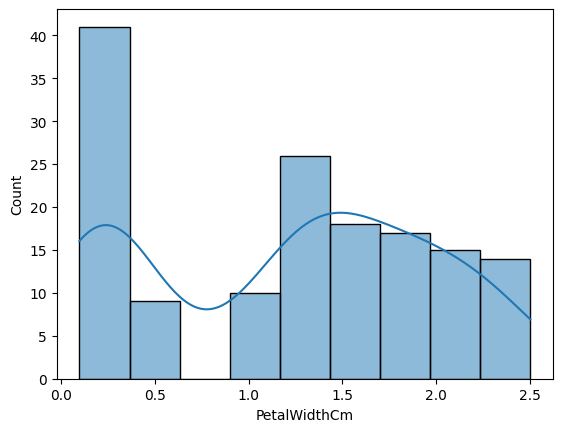

In [87]:
#Visualizing the distribution of all the continuous features
for col in cont_features.columns:
  sns.histplot(df[col],kde=True)
  skewness = df[col].skew()
  print(f"Skewness of {col} is {skewness}")
  plt.show()

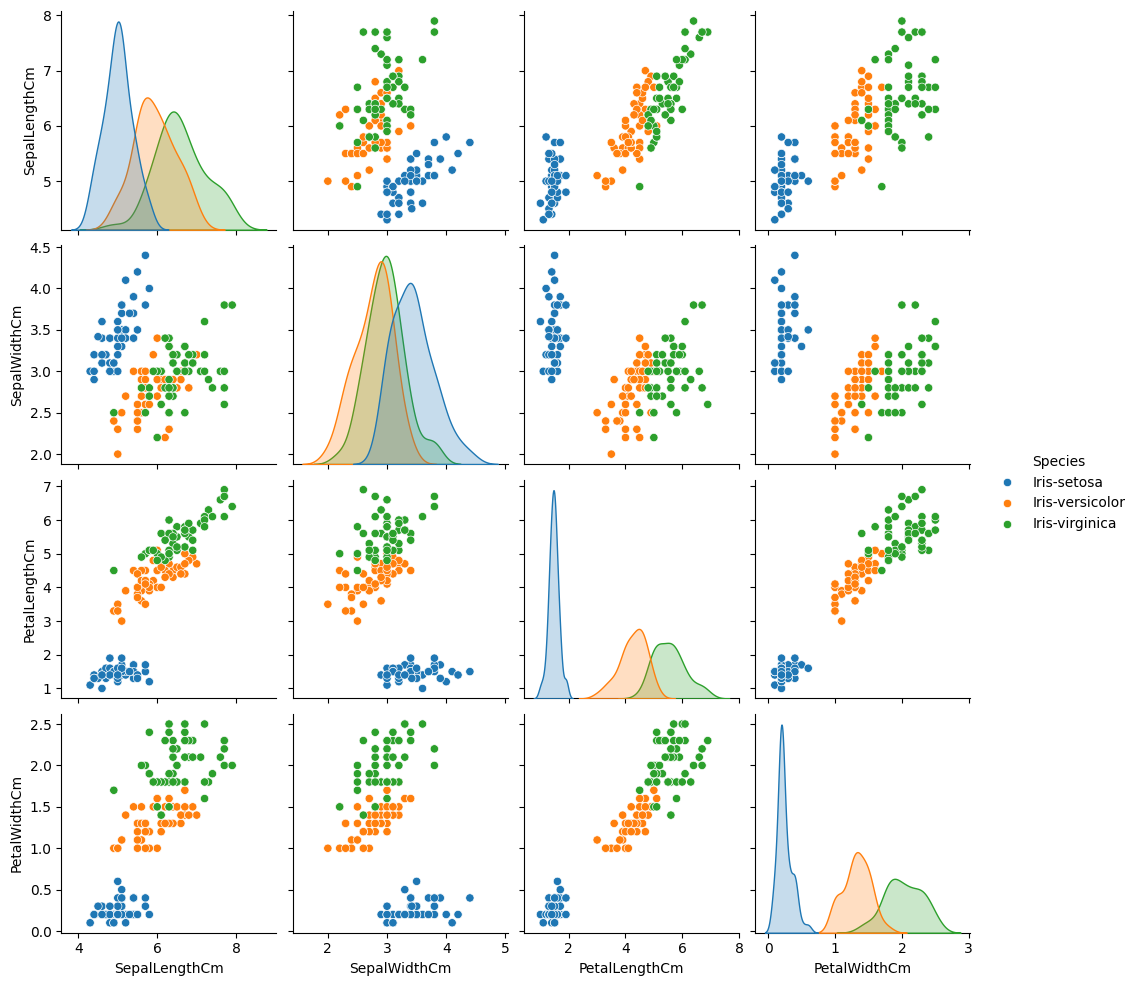

In [88]:
sns.pairplot(df,hue='Species')

In [89]:
#Encoding the categories of Species
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0


<Axes: >

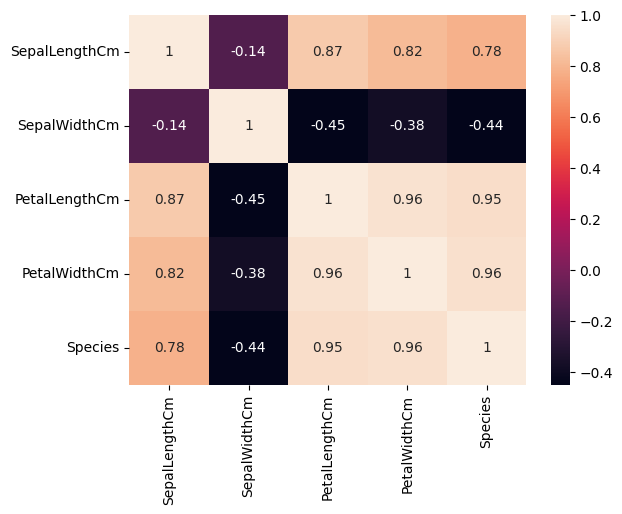

In [90]:
sns.heatmap(df.corr(),annot=True)

In [91]:
#Splitting the data into train-test split
from sklearn.model_selection import train_test_split
X = df.drop(['Species'],axis=1)
y = df['Species']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [92]:
#Scaling the data and then using KNN on the scaled data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)
print(model.get_params()['n_neighbors'])
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

5
Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [93]:
#Experimenting with different values of K
k_values = [1,2,3,4,5]
for i in k_values:
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train_scaled,y_train)
  y_pred = model.predict(X_test_scaled)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy for k={i}: {accuracy:.2f}")
  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))
  print("\nConfusion Matrix:")
  print(confusion_matrix(y_test, y_pred))

Accuracy for k=1: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Accuracy for k=2: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]
Accuracy for k=3: 1.00

Classifi

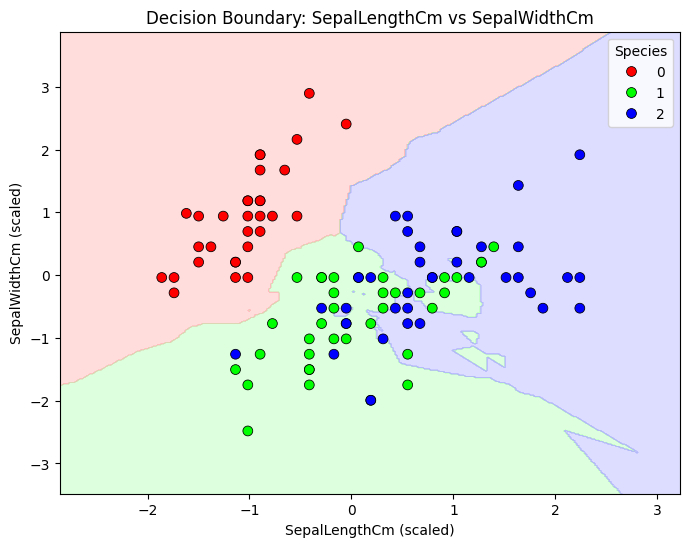

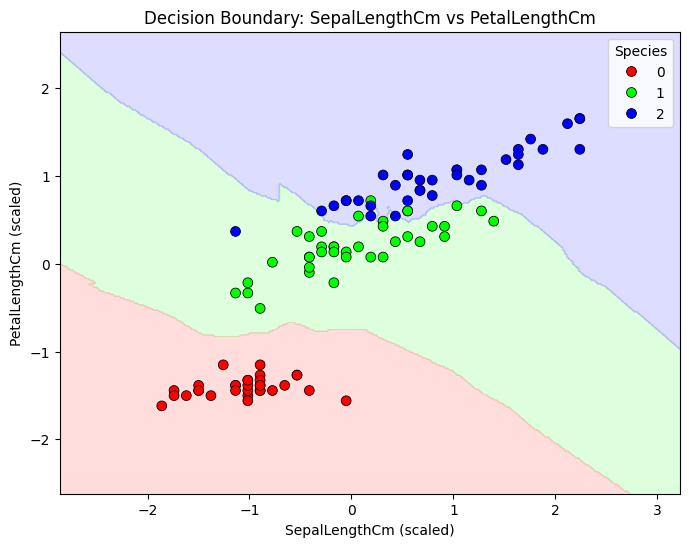

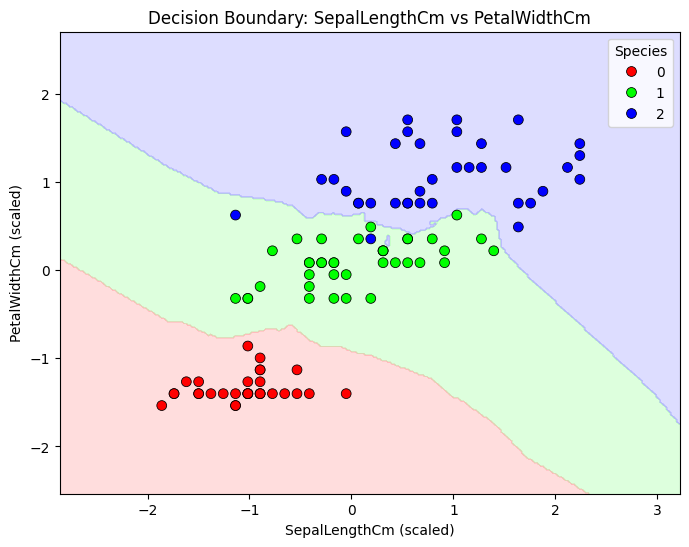

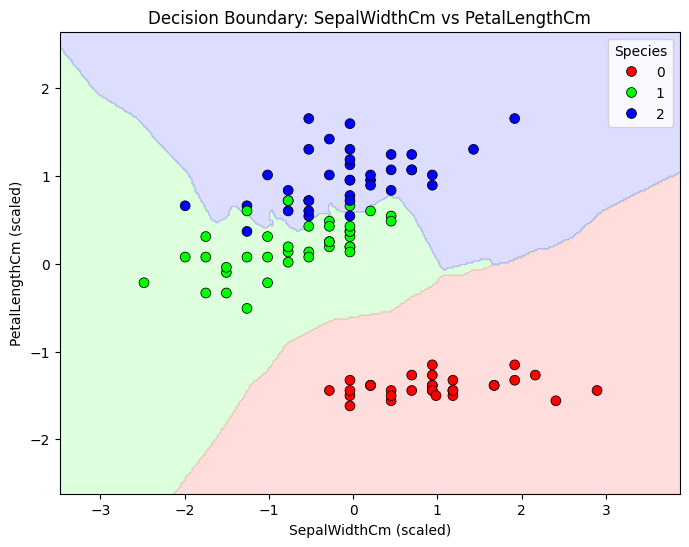

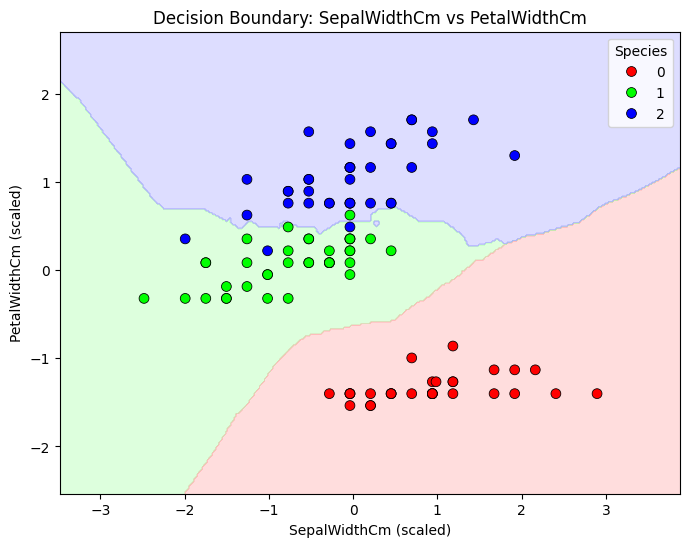

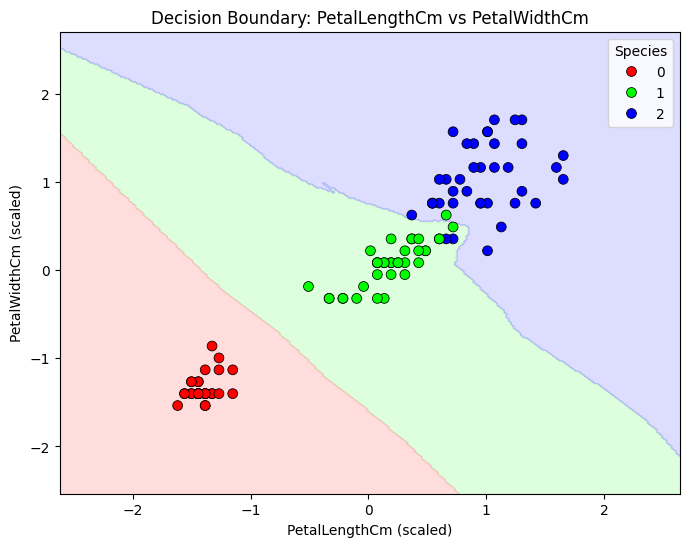

In [95]:
# Visualizing decision boundaries for each unique pair of features
from matplotlib.colors import ListedColormap

features = X.columns # Define features using column names of X

for i in range(len(features)):
    for j in range(i+1, len(features)):

        plt.figure(figsize=(8,6))

        # Select feature pair from scaled training data
        X_pair = X_train_scaled[:, [i, j]]

        # Train KNN model on the feature pair and training target variable
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_pair, y_train)

        # Create meshgrid
        x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
        y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))

        # Predict for each point in grid
        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot decision regions
        cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
        cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

        plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)

        # Scatter plot of actual points from training data
        sns.scatterplot(x=X_pair[:, 0], y=X_pair[:, 1], hue=y_train, palette=cmap_bold, s=50, edgecolor='k')

        plt.title(f"Decision Boundary: {features[i]} vs {features[j]}")
        plt.xlabel(f"{features[i]} (scaled)")
        plt.ylabel(f"{features[j]} (scaled)")
        plt.show()